In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

%cd "C:\Users\JHARE\Documents\GitHub\turbulence_tracing\particle_tracking"
import polarisation_ray_transfer_matrix as rt
import particle_tracker as pt

C:\Users\JHARE\Documents\GitHub\turbulence_tracing\particle_tracking


In [41]:
N_V = 100
M_V = 2*N_V+1
ne_extent = 5.0e-3
ne_x = np.linspace(-ne_extent,ne_extent,M_V)
ne_y = np.linspace(-ne_extent,ne_extent,M_V)
ne_z = np.linspace(-ne_extent,ne_extent,M_V)

## Shock

Ray trace completed in:	 182.6870996952057 s


<IPython.core.display.Javascript object>


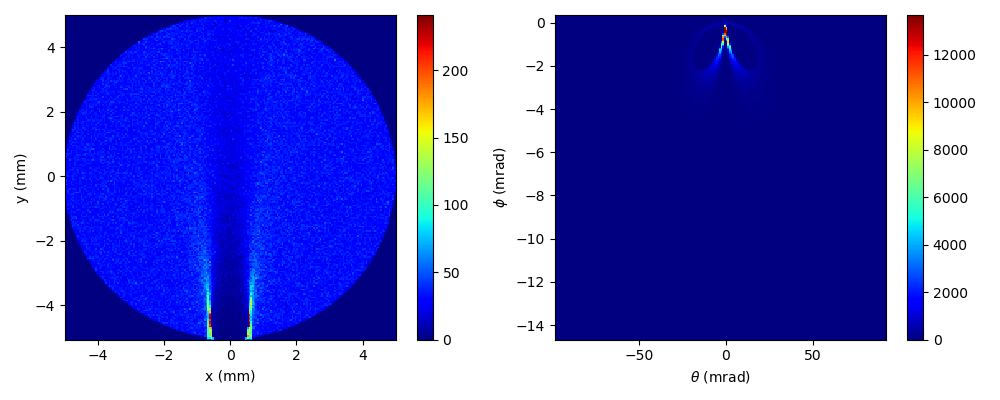

In [42]:
shock = pt.ElectronCube(ne_x, ne_y, ne_z, ne_extent, B_on = False, inv_brems = False, phaseshift = False, probing_direction = 'z')
r = shock
delta = 0.5*(r.YY+0.006)
n_e0 = 1e24 
r.ne = n_e0 * 1/(np.tanh(shock.XX/delta)**2 + 0.1)

r.calc_dndr()
r.set_up_interps()

## Initialise rays and solve
N_rays = int(1e6)
s0 = pt.init_beam(Np = N_rays, beam_size=5e-3, divergence = 0.1e-3, ne_extent = ne_extent)
r.solve(s0)
rf = r.rf

## Plot ray location and angle at output to density cube
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
nbins = 201
_,_,_,im1 = ax1.hist2d(rf[0]*1e3, rf[2]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im1,ax=ax1)
ax1.set_xlabel("x (mm)")
ax1.set_ylabel("y (mm)")
_,_,_,im2 = ax2.hist2d(rf[1]*1e3, rf[3]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im2,ax=ax2)
ax2.set_xlabel(r"$\theta$ (mrad)")
ax2.set_ylabel(r"$\phi$ (mrad)")

fig.tight_layout()

<IPython.core.display.Javascript object>


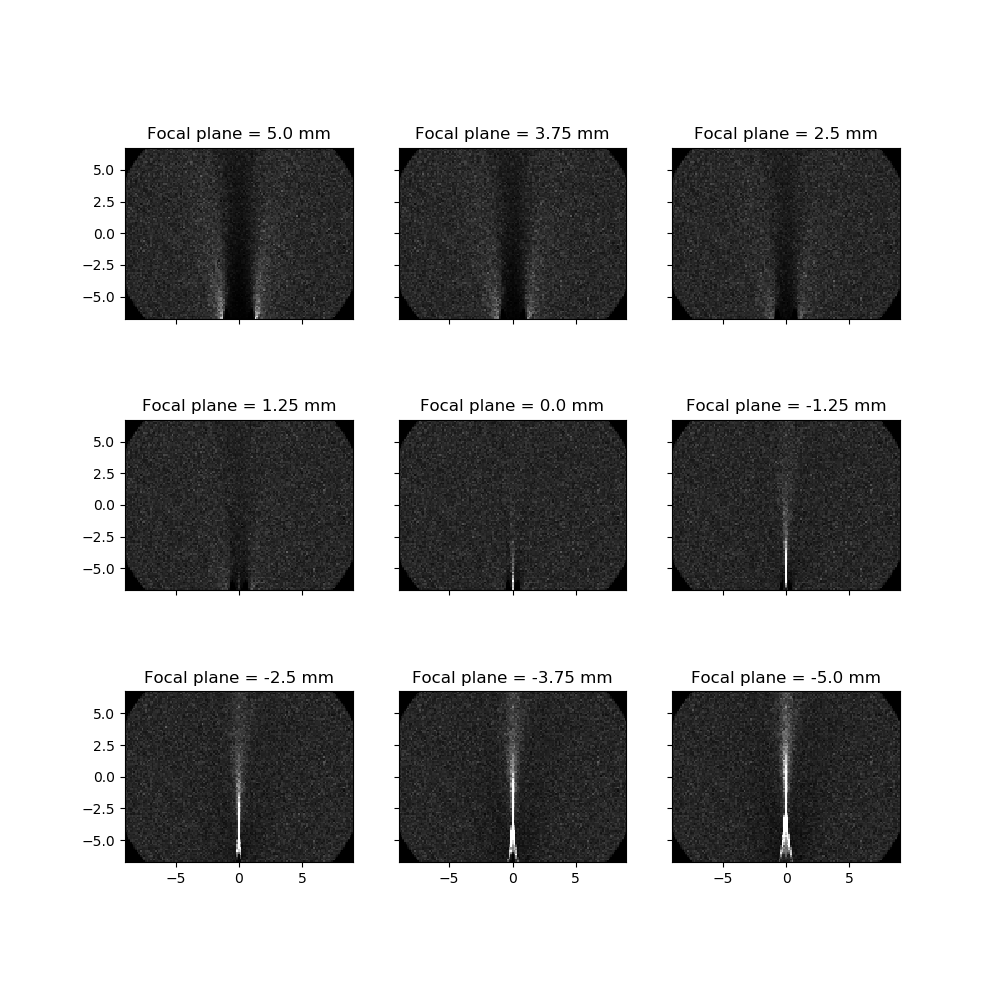

In [44]:
r = shock
r.r0 = np.zeros((6, N_rays), dtype = 'complex')
r.r0[:4,:] = r.rf
r.r0[4:,:] = r.Jf
r.r0[0,:] *=1e3 #we use mm not m for the ray tracer
r.r0[2,:] *=1e3

## The rays emerge at the end of the cube. Hence focal_plane = 0 is this face, and focal_plane = -ne_extent is the center
fig, axs = plt.subplots(3,3, figsize=(10, 10), sharex = True, sharey = True)

focal_planes = np.linspace(0, 2*ne_extent, 9)*1e3

for fp, ax in zip (focal_planes, axs.flatten()):

    s = rt.Shadowgraphy(r.r0, L = 400, R = 25, focal_plane = fp)
    s.solve()
    s.histogram(bin_scale = 25)

    cm='gray'
    clim=[0,20000]

    s.plot(ax, clim=clim, cmap=cm)
    
    ax.set_title('Focal plane = '+str(ne_extent*1e3-fp)+' mm')

## Ripple

Ray trace completed in:	 322.2653534412384 s


<IPython.core.display.Javascript object>


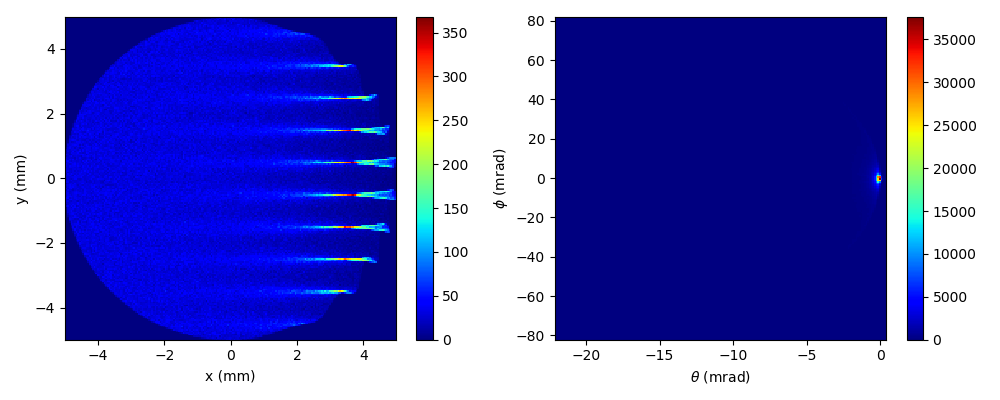

In [24]:
ripple = pt.ElectronCube(ne_x, ne_y, ne_z, ne_extent, B_on = False, inv_brems = False, phaseshift = False, probing_direction = 'z')
r = ripple

s=4*1e-3
n_e0=2e23
Ly=1e-3

r.ne = n_e0*10**(r.XX/s)*(1+np.cos(2*np.pi*r.YY/Ly))
r.calc_dndr()
r.set_up_interps()

## Initialise rays and solve
N_rays = int(1e6)
s0 = pt.init_beam(Np = N_rays, beam_size=5e-3, divergence = 0.1e-3, ne_extent = ne_extent)
r.solve(s0)
rf = r.rf

## Plot ray location and angle at output to density cube
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
nbins = 201
_,_,_,im1 = ax1.hist2d(rf[0]*1e3, rf[2]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im1,ax=ax1)
ax1.set_xlabel("x (mm)")
ax1.set_ylabel("y (mm)")
_,_,_,im2 = ax2.hist2d(rf[1]*1e3, rf[3]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im2,ax=ax2)
ax2.set_xlabel(r"$\theta$ (mrad)")
ax2.set_ylabel(r"$\phi$ (mrad)")

fig.tight_layout()

<IPython.core.display.Javascript object>


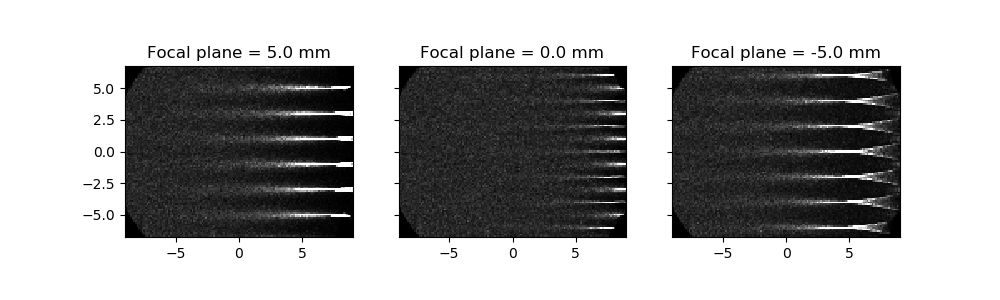

In [27]:
r.r0 = np.zeros((6, N_rays), dtype = 'complex')
r.r0[:4,:] = r.rf
r.r0[4:,:] = r.Jf
r.r0[0,:] *=1e3 #we use mm not m for the ray tracer
r.r0[2,:] *=1e3

## The rays emerge at the end of the cube. Hence focal_plane = 0 is this face, and focal_plane = -ne_extent is the center
fig, axs = plt.subplots(1,3, figsize=(10, 3), sharex = True, sharey = True)

for fp, ax in zip ([0, ne_extent*1e3, 2*ne_extent*1e3], axs):

    s = rt.Shadowgraphy(r.r0, L = 400, R = 25, focal_plane = fp)
    s.solve()
    s.histogram(bin_scale = 25)

    cm='gray'
    clim=[0,20000]

    s.plot(ax, clim=clim, cmap=cm)
    
    ax.set_title('Focal plane = '+str(ne_extent*1e3-fp)+' mm')

<IPython.core.display.Javascript object>


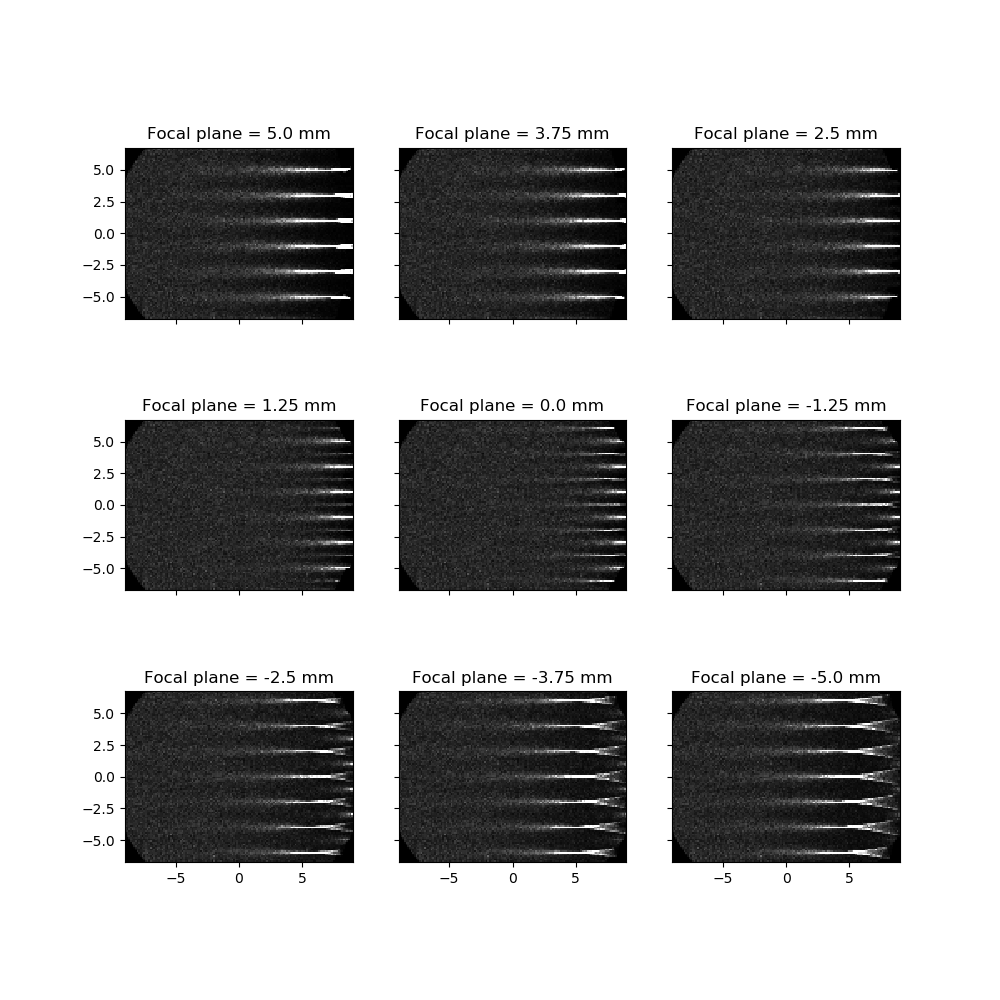

In [36]:
r.r0 = np.zeros((6, N_rays), dtype = 'complex')
r.r0[:4,:] = r.rf
r.r0[4:,:] = r.Jf
r.r0[0,:] *=1e3 #we use mm not m for the ray tracer
r.r0[2,:] *=1e3

## The rays emerge at the end of the cube. Hence focal_plane = 0 is this face, and focal_plane = -ne_extent is the center
fig, axs = plt.subplots(3,3, figsize=(10, 10), sharex = True, sharey = True)

focal_planes = np.linspace(0, 2*ne_extent, 9)*1e3

for fp, ax in zip (focal_planes, axs.flatten()):

    s = rt.Shadowgraphy(r.r0, L = 400, R = 25, focal_plane = fp)
    s.solve()
    s.histogram(bin_scale = 25)

    cm='gray'
    clim=[0,20000]

    s.plot(ax, clim=clim, cmap=cm)
    
    ax.set_title('Focal plane = '+str(ne_extent*1e3-fp)+' mm')

Ray trace completed in:	 276.01389026641846 s


<IPython.core.display.Javascript object>


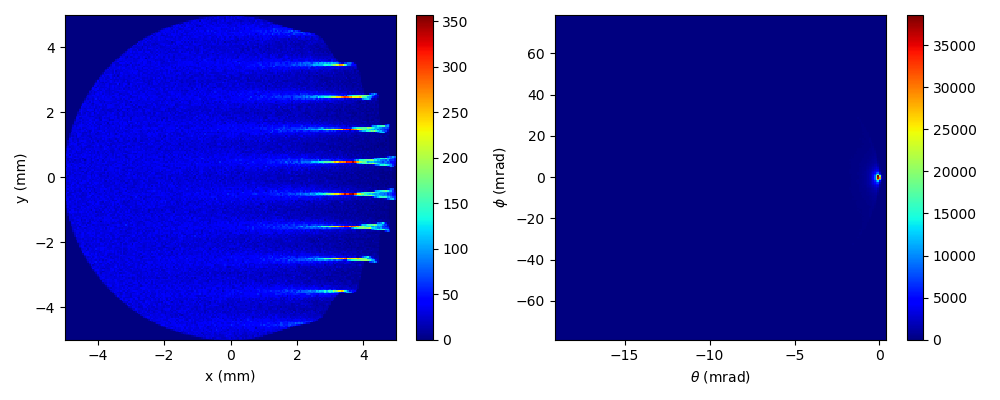

In [113]:
## phase

ripple = pt.ElectronCube(ne_x, ne_y, ne_z, ne_extent, B_on = False, inv_brems = False, phaseshift = True, probing_direction = 'z')
r = ripple

s=4*1e-3
n_e0=2e23
Ly=1e-3

r.ne = n_e0*10**(r.XX/s)*(1+np.cos(2*np.pi*r.YY/Ly))
r.calc_dndr()
r.set_up_interps()

## Initialise rays and solve
N_rays = int(1e6)
s0 = pt.init_beam(Np = N_rays, beam_size=5e-3, divergence = 0.1e-3, ne_extent = ne_extent)
r.solve(s0)
rf = r.rf

## Plot ray location and angle at output to density cube
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
nbins = 201
_,_,_,im1 = ax1.hist2d(rf[0]*1e3, rf[2]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im1,ax=ax1)
ax1.set_xlabel("x (mm)")
ax1.set_ylabel("y (mm)")
_,_,_,im2 = ax2.hist2d(rf[1]*1e3, rf[3]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im2,ax=ax2)
ax2.set_xlabel(r"$\theta$ (mrad)")
ax2.set_ylabel(r"$\phi$ (mrad)")

fig.tight_layout()

C:\Users\JHARE\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


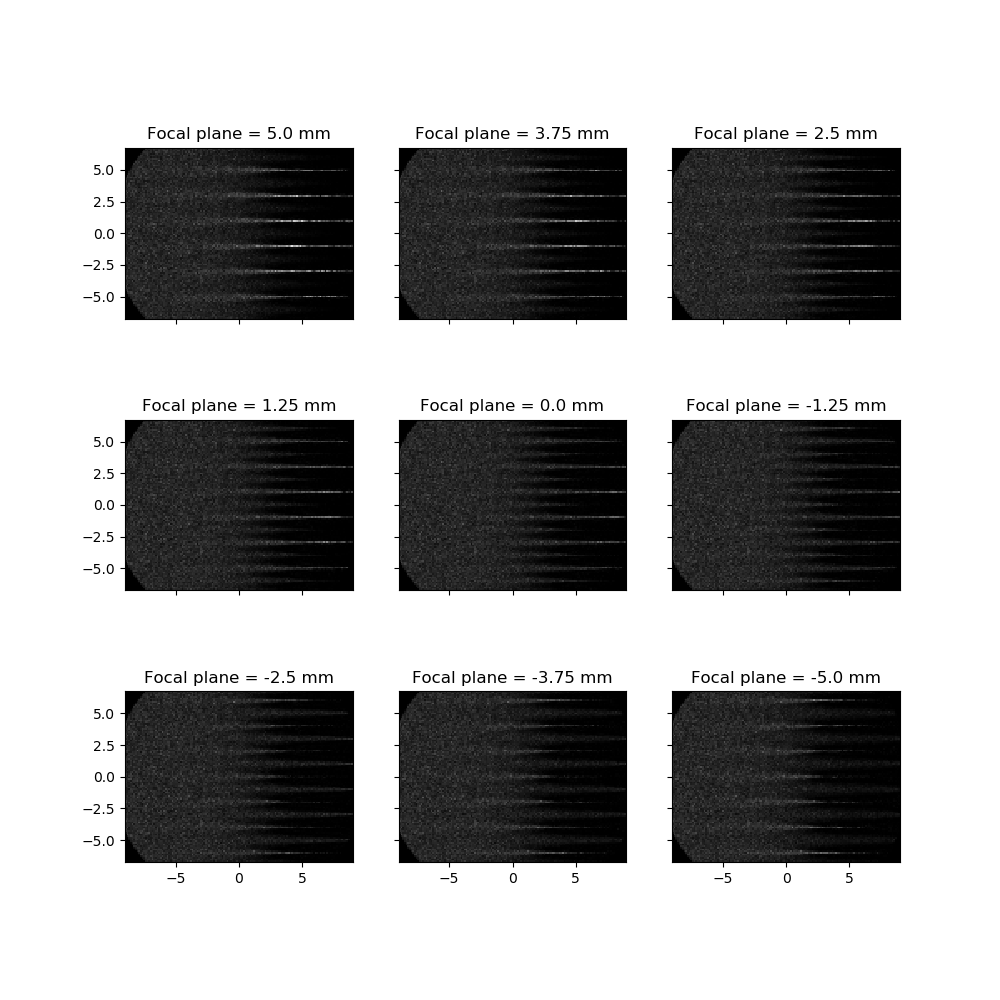

In [114]:
r.r0 = np.zeros((6, N_rays), dtype = 'complex')
r.r0[:4,:] = r.rf
r.r0[4:,:] = r.Jf
r.r0[0,:] *=1e3 #we use mm not m for the ray tracer
r.r0[2,:] *=1e3

## The rays emerge at the end of the cube. Hence focal_plane = 0 is this face, and focal_plane = -ne_extent is the center
fig, axs = plt.subplots(3,3, figsize=(10, 10), sharex = True, sharey = True)

focal_planes = np.linspace(0, 2*ne_extent, 9)*1e3

for fp, ax in zip (focal_planes, axs.flatten()):

    s = rt.Shadowgraphy(r.r0, L = 400, R = 25, focal_plane = fp)
    s.solve()
    s.histogram(bin_scale = 25)

    cm='gray'
    clim=[0,20000]

    s.plot(ax, clim=clim, cmap=cm)
    
    ax.set_title('Focal plane = '+str(ne_extent*1e3-fp)+' mm')

Ray trace completed in:	 255.66493225097656 s


<IPython.core.display.Javascript object>


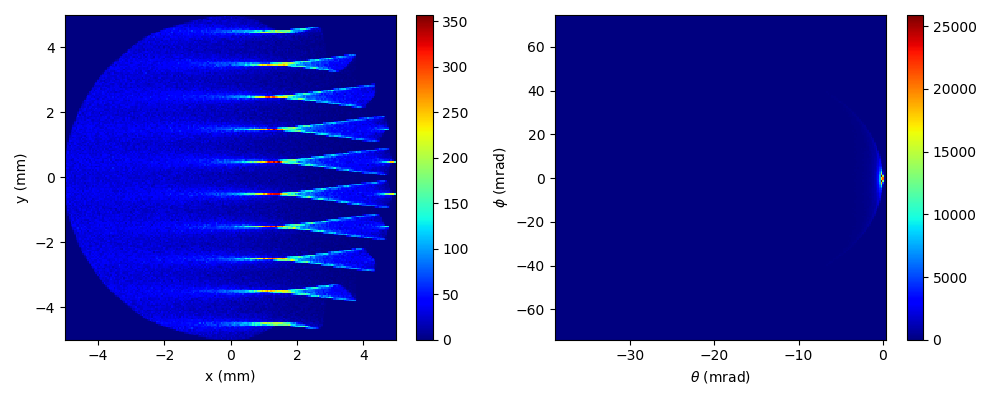

In [86]:
## change extent

N_V = 100
M_V = 2*N_V+1
ne_extent = 10.0e-3
ne_x = np.linspace(-ne_extent,ne_extent,M_V)
ne_y = np.linspace(-ne_extent,ne_extent,M_V)
ne_z = np.linspace(-ne_extent,ne_extent,M_V)

ripple = pt.ElectronCube(ne_x, ne_y, ne_z, ne_extent, B_on = False, inv_brems = False, phaseshift = False, probing_direction = 'z')
r = ripple

s=4*1e-3
n_e0=2e23
Ly=1e-3

r.ne = n_e0*10**(r.XX/s)*(1+np.cos(2*np.pi*r.YY/Ly))
r.calc_dndr()
r.set_up_interps()

## Initialise rays and solve
N_rays = int(1e6)
s0 = pt.init_beam(Np = N_rays, beam_size=5e-3, divergence = 0.1e-3, ne_extent = ne_extent)
r.solve(s0)
rf = r.rf

## Plot ray location and angle at output to density cube
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
nbins = 201
_,_,_,im1 = ax1.hist2d(rf[0]*1e3, rf[2]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im1,ax=ax1)
ax1.set_xlabel("x (mm)")
ax1.set_ylabel("y (mm)")
_,_,_,im2 = ax2.hist2d(rf[1]*1e3, rf[3]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im2,ax=ax2)
ax2.set_xlabel(r"$\theta$ (mrad)")
ax2.set_ylabel(r"$\phi$ (mrad)")

fig.tight_layout()

<IPython.core.display.Javascript object>


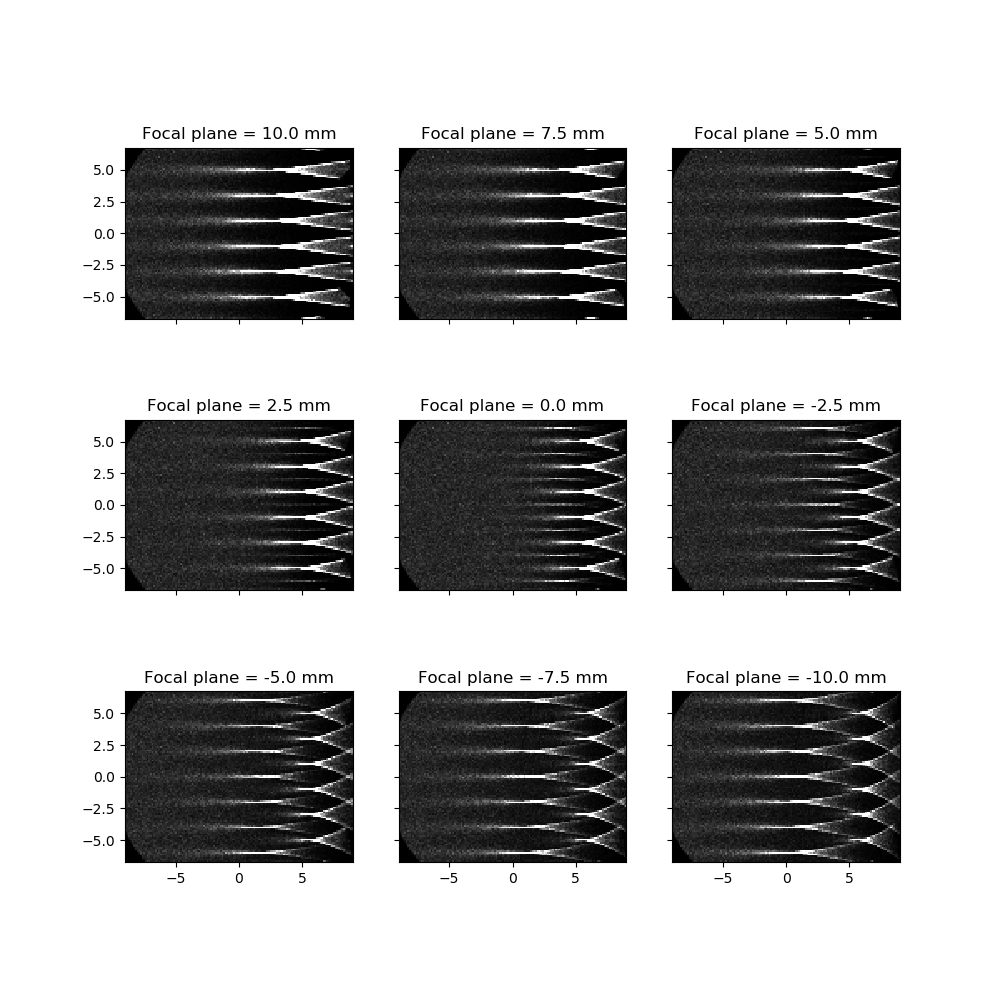

In [88]:
r.r0 = np.zeros((6, N_rays), dtype = 'complex')
r.r0[:4,:] = r.rf
r.r0[4:,:] = r.Jf
r.r0[0,:] *=1e3 #we use mm not m for the ray tracer
r.r0[2,:] *=1e3

## The rays emerge at the end of the cube. Hence focal_plane = 0 is this face, and focal_plane = -ne_extent is the center
fig, axs = plt.subplots(3,3, figsize=(10, 10), sharex = True, sharey = True)

focal_planes = np.linspace(0, 2*ne_extent, 9)*1e3 #from front to back of cube

for fp, ax in zip (focal_planes, axs.flatten()):

    s = rt.Shadowgraphy(r.r0, L = 400, R = 25, focal_plane = fp)
    s.solve()
    s.histogram(bin_scale = 25)

    cm='gray'
    clim=[0,20000]

    s.plot(ax, clim=clim, cmap=cm)
    
    ax.set_title('Focal plane = '+str(ne_extent*1e3-fp)+' mm')

## Non-linear ripples

Ray trace completed in:	 212.9721269607544 s


<IPython.core.display.Javascript object>


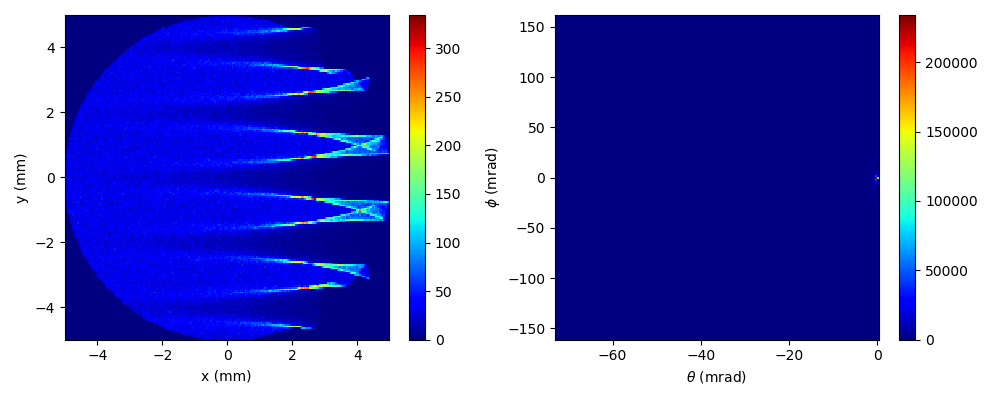

In [109]:
N_V = 100
M_V = 2*N_V+1
ne_extent = 5.0e-3
ne_x = np.linspace(-ne_extent,ne_extent,M_V)
ne_y = np.linspace(-ne_extent,ne_extent,M_V)
ne_z = np.linspace(-ne_extent,ne_extent,M_V)


ripple = pt.ElectronCube(ne_x, ne_y, ne_z, ne_extent, B_on = False, inv_brems = False, phaseshift = False, probing_direction = 'z')
r = ripple

s=4*1e-3
n_e0=1e23
Ly=2e-3

r.ne = n_e0*10**(r.XX/s)*(1+np.cos(2*np.pi*r.YY/Ly))**4
r.calc_dndr()
r.set_up_interps()

## Initialise rays and solve
N_rays = int(1e6)
s0 = pt.init_beam(Np = N_rays, beam_size=5e-3, divergence = 0.1e-3, ne_extent = ne_extent)
r.solve(s0)
rf = r.rf

## Plot ray location and angle at output to density cube
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
nbins = 201
_,_,_,im1 = ax1.hist2d(rf[0]*1e3, rf[2]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im1,ax=ax1)
ax1.set_xlabel("x (mm)")
ax1.set_ylabel("y (mm)")
_,_,_,im2 = ax2.hist2d(rf[1]*1e3, rf[3]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im2,ax=ax2)
ax2.set_xlabel(r"$\theta$ (mrad)")
ax2.set_ylabel(r"$\phi$ (mrad)")

fig.tight_layout()

<IPython.core.display.Javascript object>


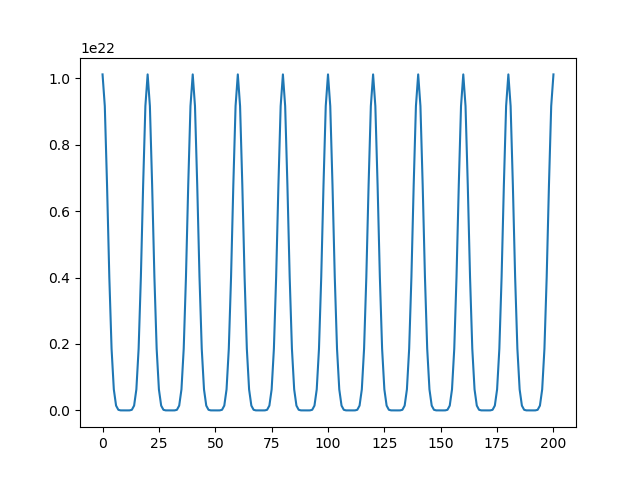

In [106]:
s=4*1e-3
n_e0=2e23
Ly=2e-3

r.ne = n_e0*10**(r.XX/s)*(1+np.cos(2*np.pi*r.YY/Ly))**4

fig,ax = plt.subplots()

ax.plot(r.ne[0,:,50].T)

<IPython.core.display.Javascript object>


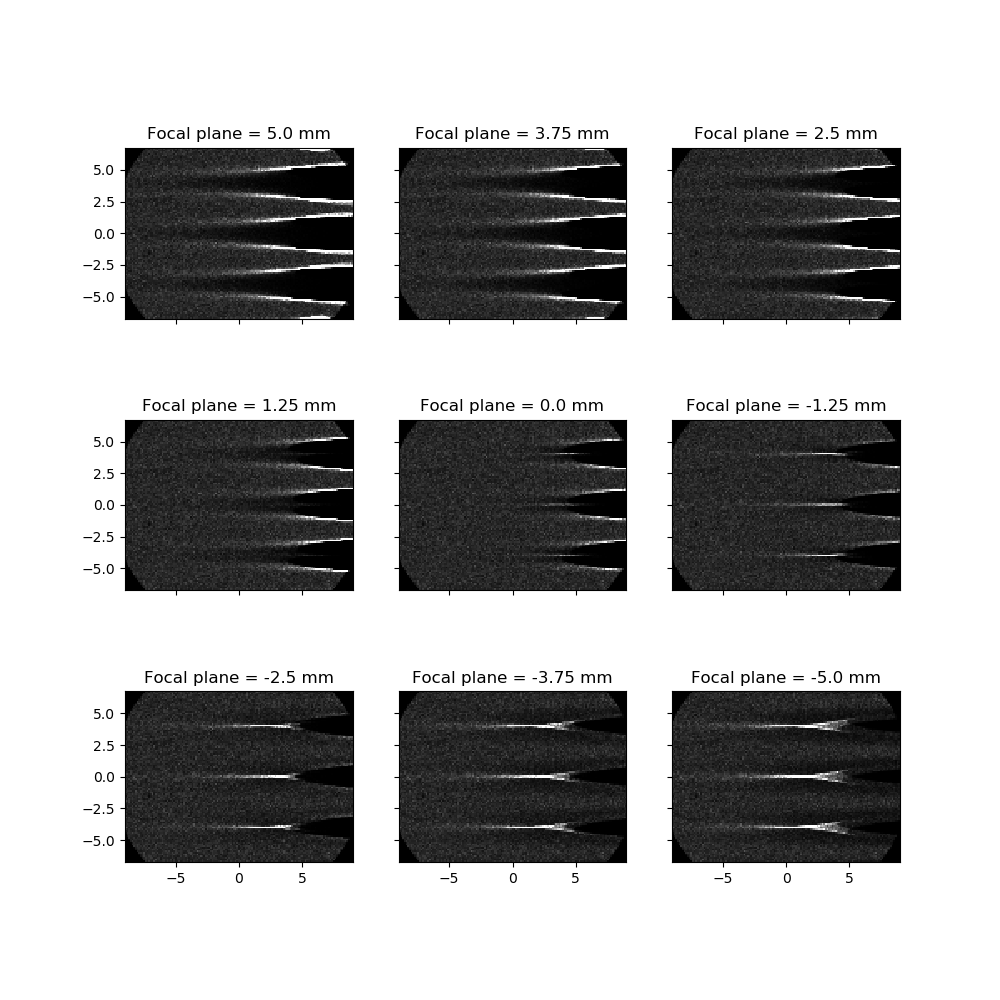

In [110]:
r.r0 = np.zeros((6, N_rays), dtype = 'complex')
r.r0[:4,:] = r.rf
r.r0[4:,:] = r.Jf
r.r0[0,:] *=1e3 #we use mm not m for the ray tracer
r.r0[2,:] *=1e3

## The rays emerge at the end of the cube. Hence focal_plane = 0 is this face, and focal_plane = -ne_extent is the center
fig, axs = plt.subplots(3,3, figsize=(10, 10), sharex = True, sharey = True)

focal_planes = np.linspace(0, 2*ne_extent, 9)*1e3 #from front to back of cube

for fp, ax in zip (focal_planes, axs.flatten()):

    s = rt.Shadowgraphy(r.r0, L = 400, R = 25, focal_plane = fp)
    s.solve()
    s.histogram(bin_scale = 25)

    cm='gray'
    clim=[0,20000]

    s.plot(ax, clim=clim, cmap=cm)
    
    ax.set_title('Focal plane = '+str(ne_extent*1e3-fp)+' mm')

Ray trace completed in:	 288.08332681655884 s


<IPython.core.display.Javascript object>


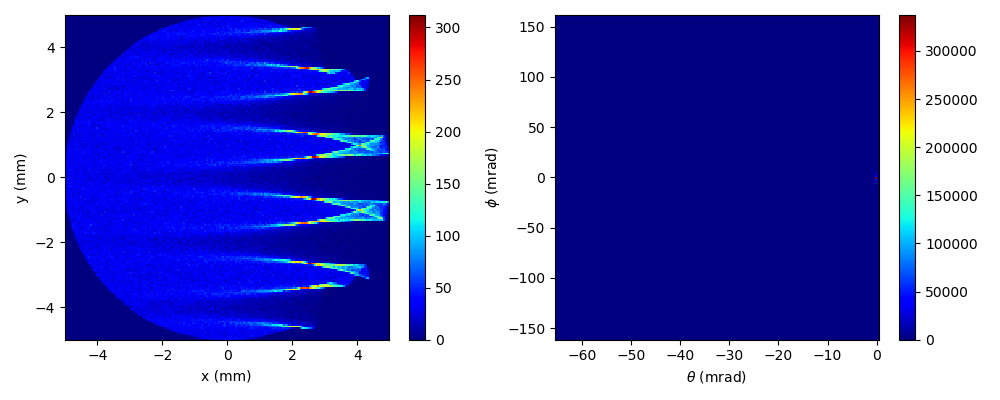

In [111]:
## with phase

N_V = 100
M_V = 2*N_V+1
ne_extent = 5.0e-3
ne_x = np.linspace(-ne_extent,ne_extent,M_V)
ne_y = np.linspace(-ne_extent,ne_extent,M_V)
ne_z = np.linspace(-ne_extent,ne_extent,M_V)


ripple = pt.ElectronCube(ne_x, ne_y, ne_z, ne_extent, B_on = False, inv_brems = False, phaseshift = True, probing_direction = 'z')
r = ripple

s=4*1e-3
n_e0=1e23
Ly=2e-3

r.ne = n_e0*10**(r.XX/s)*(1+np.cos(2*np.pi*r.YY/Ly))**4
r.calc_dndr()
r.set_up_interps()

## Initialise rays and solve
N_rays = int(1e6)
s0 = pt.init_beam(Np = N_rays, beam_size=5e-3, divergence = 0.1e-3, ne_extent = ne_extent)
r.solve(s0)
rf = r.rf

## Plot ray location and angle at output to density cube
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
nbins = 201
_,_,_,im1 = ax1.hist2d(rf[0]*1e3, rf[2]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im1,ax=ax1)
ax1.set_xlabel("x (mm)")
ax1.set_ylabel("y (mm)")
_,_,_,im2 = ax2.hist2d(rf[1]*1e3, rf[3]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im2,ax=ax2)
ax2.set_xlabel(r"$\theta$ (mrad)")
ax2.set_ylabel(r"$\phi$ (mrad)")

fig.tight_layout()

<IPython.core.display.Javascript object>


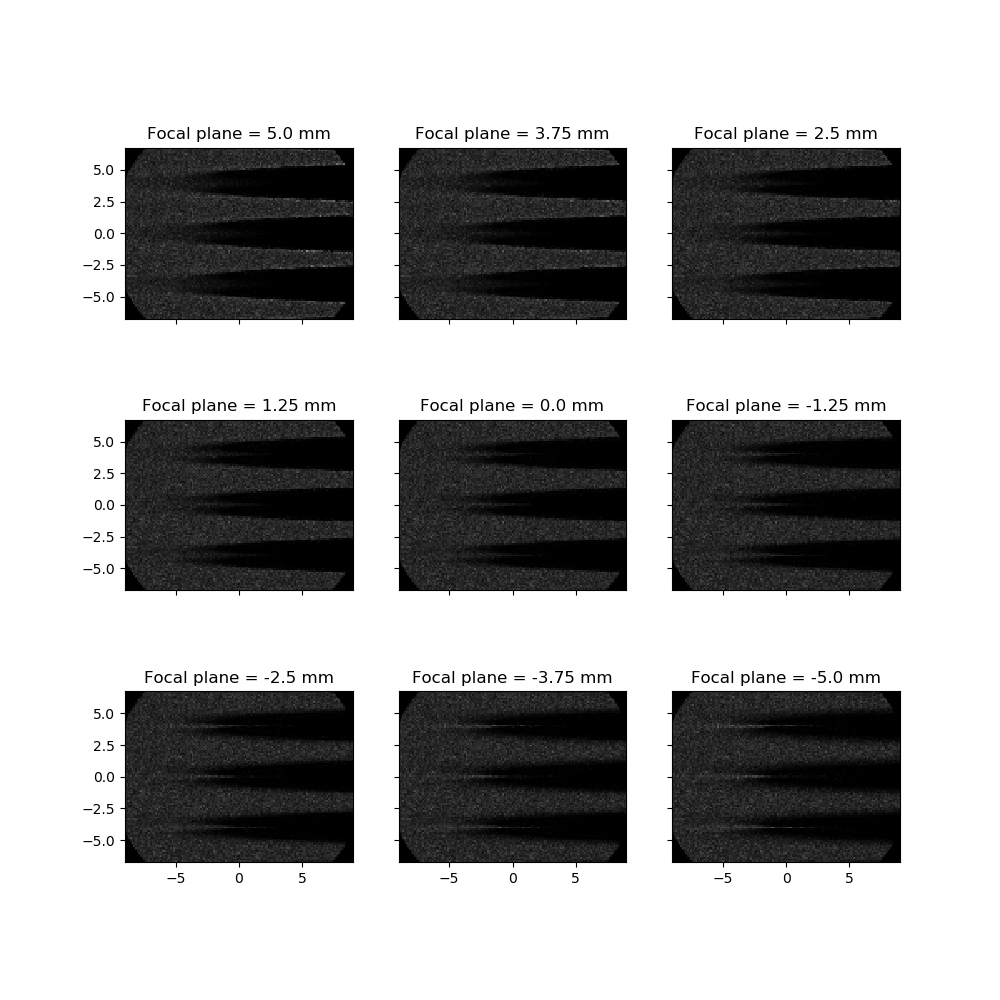

In [112]:
r.r0 = np.zeros((6, N_rays), dtype = 'complex')
r.r0[:4,:] = r.rf
r.r0[4:,:] = r.Jf
r.r0[0,:] *=1e3 #we use mm not m for the ray tracer
r.r0[2,:] *=1e3

## The rays emerge at the end of the cube. Hence focal_plane = 0 is this face, and focal_plane = -ne_extent is the center
fig, axs = plt.subplots(3,3, figsize=(10, 10), sharex = True, sharey = True)

focal_planes = np.linspace(0, 2*ne_extent, 9)*1e3 #from front to back of cube

for fp, ax in zip (focal_planes, axs.flatten()):

    s = rt.Shadowgraphy(r.r0, L = 400, R = 25, focal_plane = fp)
    s.solve()
    s.histogram(bin_scale = 25)

    cm='gray'
    clim=[0,20000]

    s.plot(ax, clim=clim, cmap=cm)
    
    ax.set_title('Focal plane = '+str(ne_extent*1e3-fp)+' mm')

## Ripple Grid

Ray trace completed in:	 220.3265199661255 s


<IPython.core.display.Javascript object>


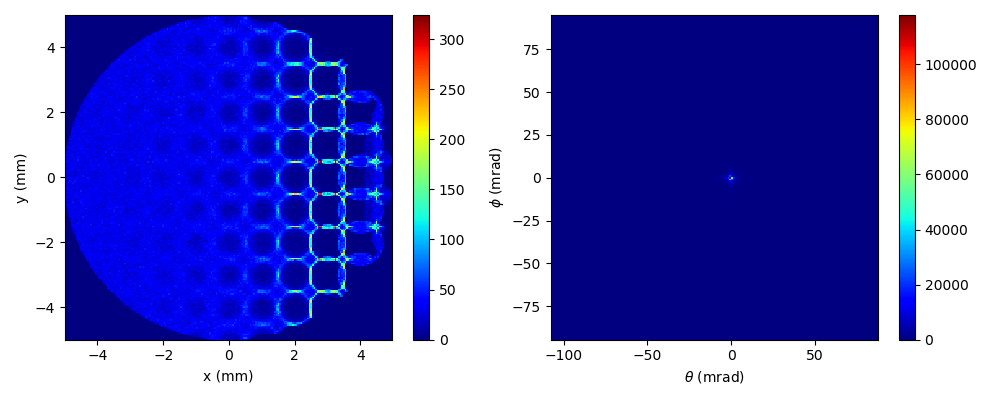

In [62]:
rg = pt.ElectronCube(ne_x, ne_y, ne_z, ne_extent, B_on = False, inv_brems = False, phaseshift = False, probing_direction = 'z')
r = rg

s=4*1e-3
n_e0=2e23
Ly=1e-3

r.ne = n_e0*10**(r.XX/s)*(1+np.cos(2*np.pi*r.YY/Ly))*(1+np.cos(2*np.pi*r.XX/Ly))
r.calc_dndr()
r.set_up_interps()

## Initialise rays and solve
N_rays = int(1e6)
s0 = pt.init_beam(Np = N_rays, beam_size=5e-3, divergence = 0.1e-3, ne_extent = ne_extent)
r.solve(s0)
rf = r.rf

## Plot ray location and angle at output to density cube
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
nbins = 201
_,_,_,im1 = ax1.hist2d(rf[0]*1e3, rf[2]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im1,ax=ax1)
ax1.set_xlabel("x (mm)")
ax1.set_ylabel("y (mm)")
_,_,_,im2 = ax2.hist2d(rf[1]*1e3, rf[3]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im2,ax=ax2)
ax2.set_xlabel(r"$\theta$ (mrad)")
ax2.set_ylabel(r"$\phi$ (mrad)")

fig.tight_layout()

<IPython.core.display.Javascript object>


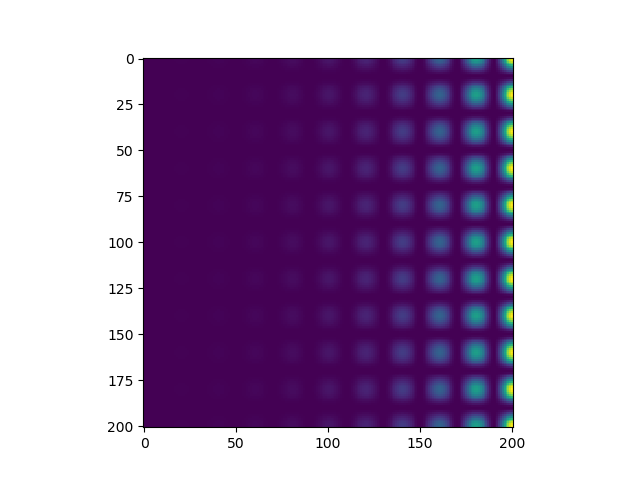

In [78]:
s=4*1e-3
n_e0=2e23
Ly=1e-3

r.ne = n_e0*10**(r.XX/s)*(1+np.cos(2*np.pi*r.YY/Ly))*(1+np.cos(2*np.pi*r.XX/Ly))*np.cos(np.pi/2*r.ZZ/ne_extent)

fig,ax = plt.subplots()

ax.imshow(r.ne[:,:,50].T)

<IPython.core.display.Javascript object>


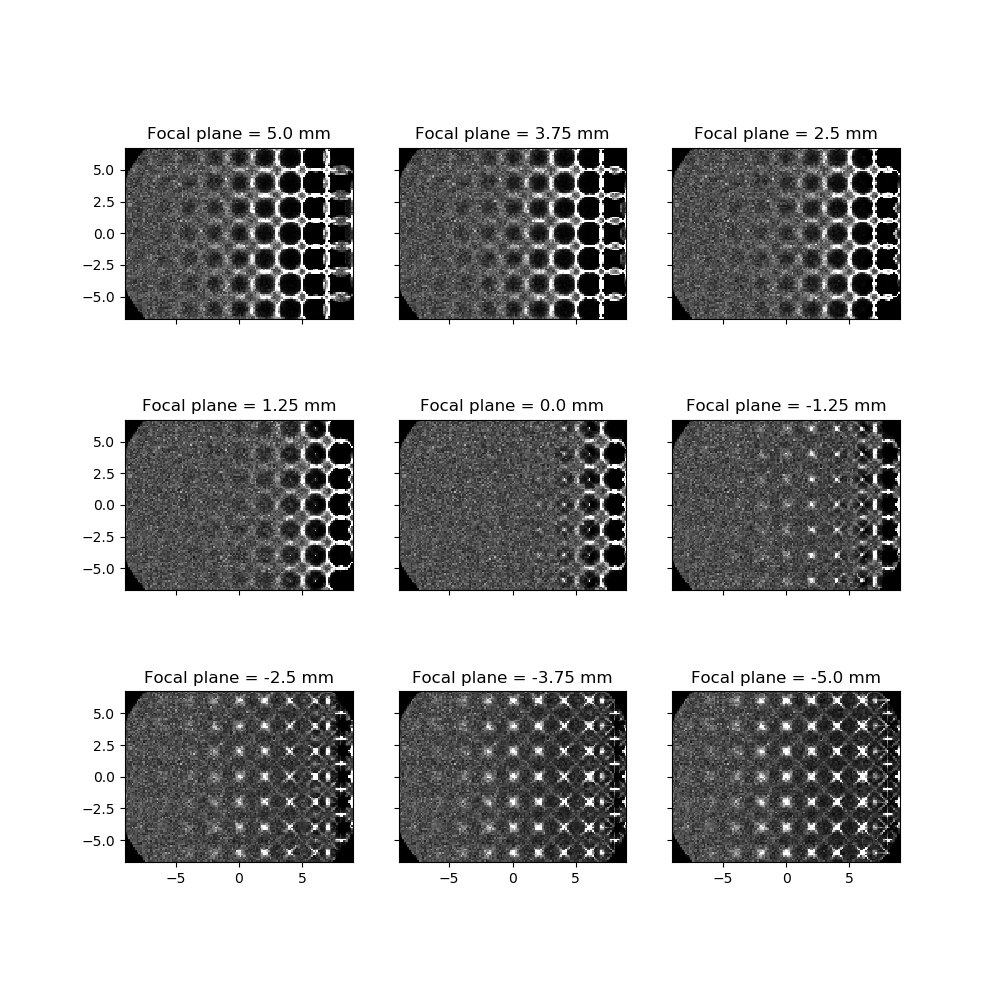

In [63]:
r.r0 = np.zeros((6, N_rays), dtype = 'complex')
r.r0[:4,:] = r.rf
r.r0[4:,:] = r.Jf
r.r0[0,:] *=1e3 #we use mm not m for the ray tracer
r.r0[2,:] *=1e3

## The rays emerge at the end of the cube. Hence focal_plane = 0 is this face, and focal_plane = -ne_extent is the center
fig, axs = plt.subplots(3,3, figsize=(10, 10), sharex = True, sharey = True)

focal_planes = np.linspace(0, 2*ne_extent, 9)*1e3

for fp, ax in zip (focal_planes, axs.flatten()):

    s = rt.Shadowgraphy(r.r0, L = 400, R = 25, focal_plane = fp)
    s.solve()
    s.histogram(bin_scale = 25)

    cm='gray'
    clim=[0,10000]

    s.plot(ax, clim=clim, cmap=cm)
    
    ax.set_title('Focal plane = '+str(ne_extent*1e3-fp)+' mm')

<IPython.core.display.Javascript object>


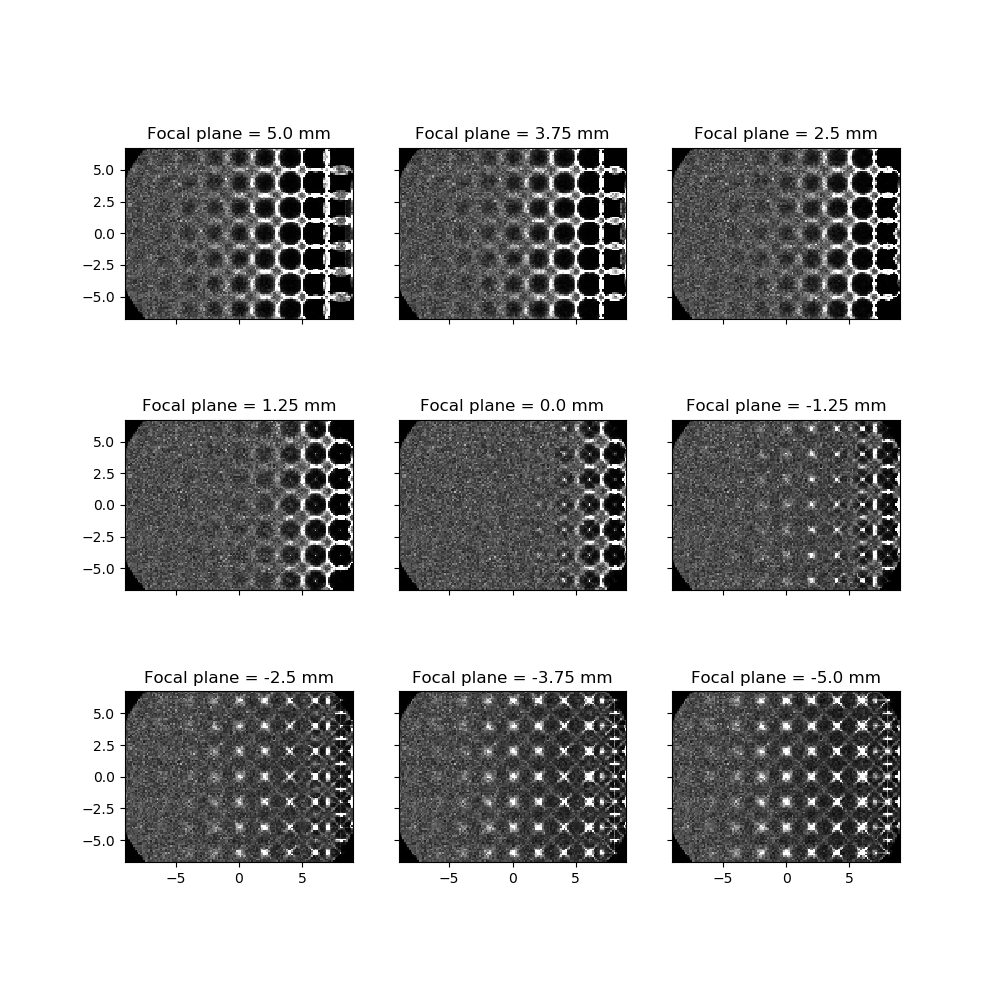

In [64]:
r.r0 = np.zeros((6, N_rays), dtype = 'complex')
r.r0[:4,:] = r.rf
r.r0[4:,:] = r.Jf
r.r0[0,:] *=1e3 #we use mm not m for the ray tracer
r.r0[2,:] *=1e3

## The rays emerge at the end of the cube. Hence focal_plane = 0 is this face, and focal_plane = -ne_extent is the center
fig, axs = plt.subplots(3,3, figsize=(10, 10), sharex = True, sharey = True)

focal_planes = np.linspace(0, 2*ne_extent, 9)*1e3

for fp, ax in zip (focal_planes, axs.flatten()):

    s = rt.Shadowgraphy(r.r0, L = 200, R = 25, focal_plane = fp)
    s.solve()
    s.histogram(bin_scale = 25)

    cm='gray'
    clim=[0,10000]

    s.plot(ax, clim=clim, cmap=cm)
    
    ax.set_title('Focal plane = '+str(ne_extent*1e3-fp)+' mm')

Ray trace completed in:	 155.72536039352417 s


<IPython.core.display.Javascript object>


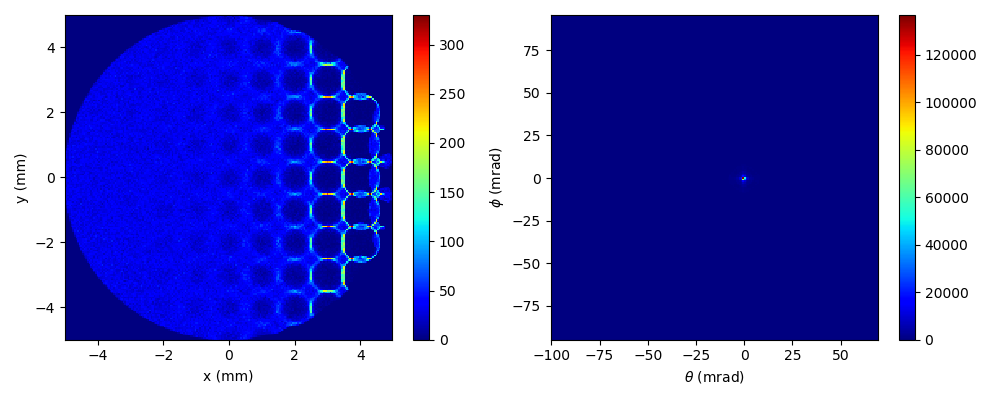

In [79]:
##Ripple grid with z hamming

rg = pt.ElectronCube(ne_x, ne_y, ne_z, ne_extent, B_on = False, inv_brems = False, phaseshift = False, probing_direction = 'z')
r = rg

s=4*1e-3
n_e0=2e23
Ly=1e-3

r.ne = n_e0*10**(r.XX/s)*(1+np.cos(2*np.pi*r.YY/Ly))*(1+np.cos(2*np.pi*r.XX/Ly))*np.cos(np.pi/2*r.ZZ/ne_extent)
r.calc_dndr()
r.set_up_interps()

## Initialise rays and solve
N_rays = int(1e6)
s0 = pt.init_beam(Np = N_rays, beam_size=5e-3, divergence = 0.1e-3, ne_extent = ne_extent)
r.solve(s0)
rf = r.rf

## Plot ray location and angle at output to density cube
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
nbins = 201
_,_,_,im1 = ax1.hist2d(rf[0]*1e3, rf[2]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im1,ax=ax1)
ax1.set_xlabel("x (mm)")
ax1.set_ylabel("y (mm)")
_,_,_,im2 = ax2.hist2d(rf[1]*1e3, rf[3]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im2,ax=ax2)
ax2.set_xlabel(r"$\theta$ (mrad)")
ax2.set_ylabel(r"$\phi$ (mrad)")

fig.tight_layout()

<IPython.core.display.Javascript object>


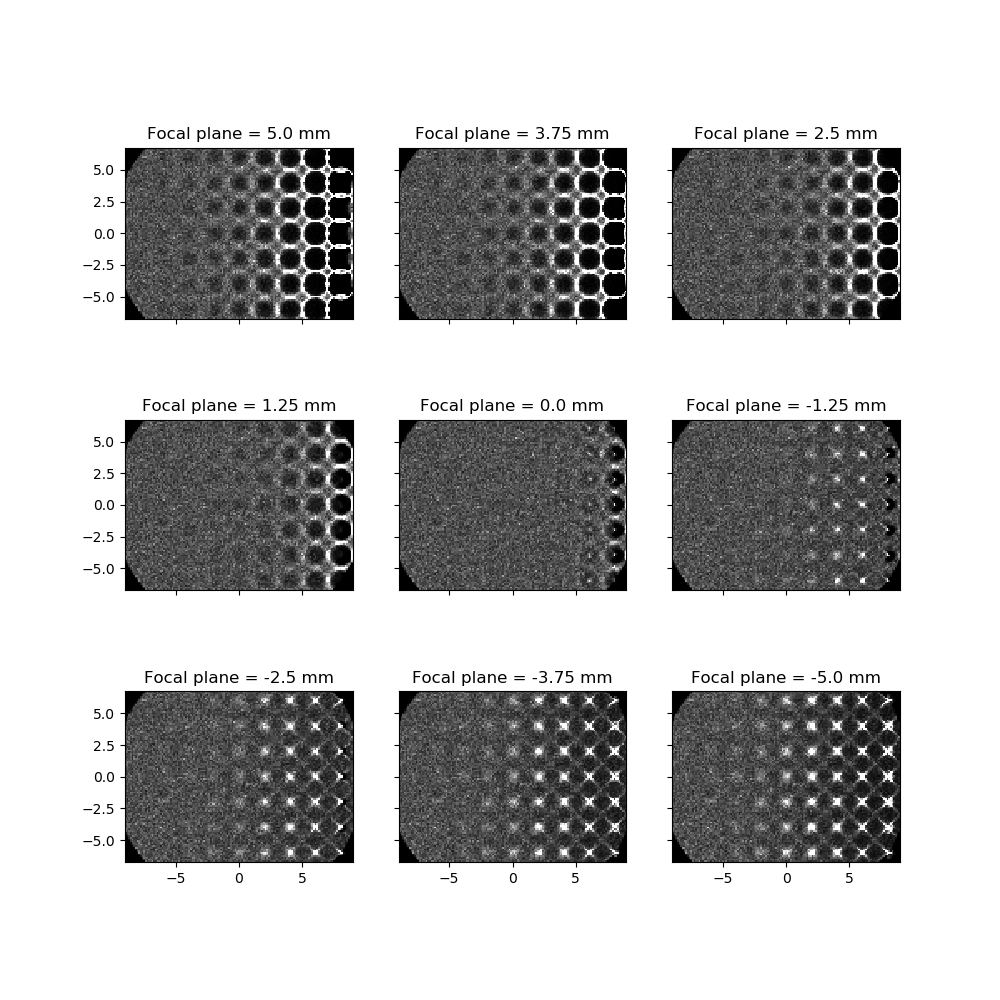

In [80]:
r.r0 = np.zeros((6, N_rays), dtype = 'complex')
r.r0[:4,:] = r.rf
r.r0[4:,:] = r.Jf
r.r0[0,:] *=1e3 #we use mm not m for the ray tracer
r.r0[2,:] *=1e3

## The rays emerge at the end of the cube. Hence focal_plane = 0 is this face, and focal_plane = -ne_extent is the center
fig, axs = plt.subplots(3,3, figsize=(10, 10), sharex = True, sharey = True)

focal_planes = np.linspace(0, 2*ne_extent, 9)*1e3

for fp, ax in zip (focal_planes, axs.flatten()):

    s = rt.Shadowgraphy(r.r0, L = 400, R = 25, focal_plane = fp)
    s.solve()
    s.histogram(bin_scale = 25)

    cm='gray'
    clim=[0,10000]

    s.plot(ax, clim=clim, cmap=cm)
    
    ax.set_title('Focal plane = '+str(ne_extent*1e3-fp)+' mm')

## Phase tests

Ray trace completed in:	 329.55348467826843 s


C:\Users\JHARE\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


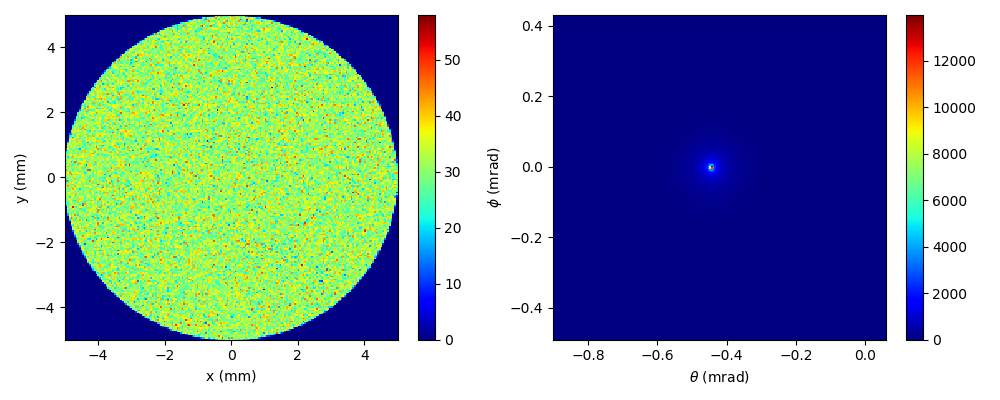

In [118]:
## phase

lr = pt.ElectronCube(ne_x, ne_y, ne_z, ne_extent, B_on = False, inv_brems = False, phaseshift = True, probing_direction = 'z')
r = lr

n_e0=1e26
r.ne = n_e0*(r.XX+0.005)

r.calc_dndr()
r.set_up_interps()

## Initialise rays and solve
N_rays = int(1e6)
s0 = pt.init_beam(Np = N_rays, beam_size=5e-3, divergence = 0.1e-3, ne_extent = ne_extent)
r.solve(s0)
rf = r.rf

## Plot ray location and angle at output to density cube
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
nbins = 201
_,_,_,im1 = ax1.hist2d(rf[0]*1e3, rf[2]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im1,ax=ax1)
ax1.set_xlabel("x (mm)")
ax1.set_ylabel("y (mm)")
_,_,_,im2 = ax2.hist2d(rf[1]*1e3, rf[3]*1e3, bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im2,ax=ax2)
ax2.set_xlabel(r"$\theta$ (mrad)")
ax2.set_ylabel(r"$\phi$ (mrad)")

fig.tight_layout()

C:\Users\JHARE\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


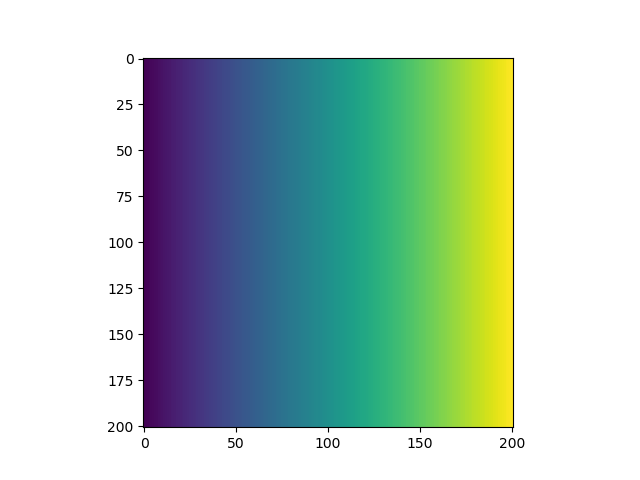

In [117]:
n_e0=1e26
r.ne = n_e0*(r.XX+0.005)

fig,ax = plt.subplots()

ax.imshow(r.ne[:,:,50].T)

C:\Users\JHARE\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


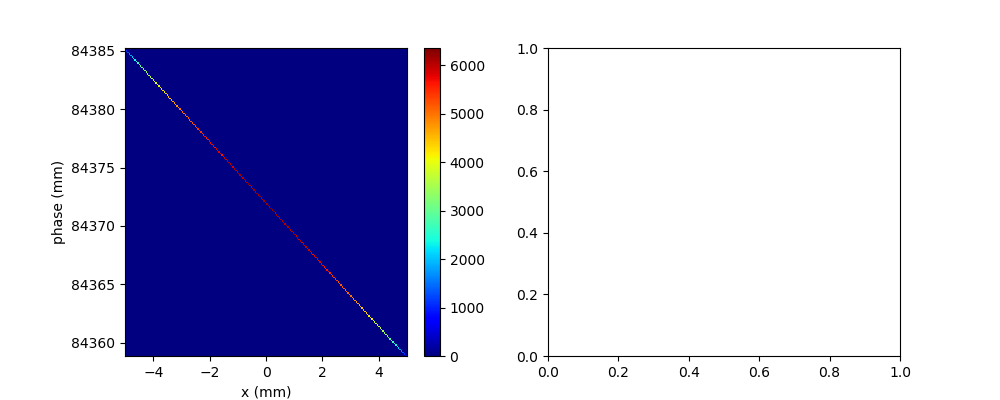

Text(0, 0.5, 'phase (mm)')

In [136]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
nbins = 201
_,_,_,im1 = ax1.hist2d(r.sf[0]*1e3, r.sf[7], bins=(nbins, nbins), cmap=plt.cm.jet);
plt.colorbar(im1,ax=ax1)
ax1.set_xlabel("x (mm)")
ax1.set_ylabel("phase (mm)")

In [130]:
r.sf[5].max(), r.sf[5].min()

(299792458.0, 299792420.29899836)

In [140]:
dz = r.z[1]-r.z[0]

ne_dl = r.ne.sum(axis = 2)[:,0]*dz

In [147]:
F = 2.1e17 #cm^-2
2*np.pi*ne_dl*1e-4/F

array([ 0.        ,  0.15034765,  0.3006953 ,  0.45104295,  0.60139059,
        0.75173824,  0.90208589,  1.05243354,  1.20278119,  1.35312884,
        1.50347648,  1.65382413,  1.80417178,  1.95451943,  2.10486708,
        2.25521473,  2.40556237,  2.55591002,  2.70625767,  2.85660532,
        3.00695297,  3.15730062,  3.30764827,  3.45799591,  3.60834356,
        3.75869121,  3.90903886,  4.05938651,  4.20973416,  4.3600818 ,
        4.51042945,  4.6607771 ,  4.81112475,  4.9614724 ,  5.11182005,
        5.26216769,  5.41251534,  5.56286299,  5.71321064,  5.86355829,
        6.01390594,  6.16425359,  6.31460123,  6.46494888,  6.61529653,
        6.76564418,  6.91599183,  7.06633948,  7.21668712,  7.36703477,
        7.51738242,  7.66773007,  7.81807772,  7.96842537,  8.11877301,
        8.26912066,  8.41946831,  8.56981596,  8.72016361,  8.87051126,
        9.02085891,  9.17120655,  9.3215542 ,  9.47190185,  9.6222495 ,
        9.77259715,  9.9229448 , 10.07329244, 10.22364009, 10.37

In [145]:
dz

4.99999999999997e-05